In [1]:
# Wordclouds

In [7]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
path="/content/drive/MyDrive/Datasets/Movie_Compiled.csv"

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
movie_reviews=pd.read_csv(path,na_values="")

In [14]:
movie_reviews.head()

,Rating,Date,Title,Review
0,,12-Apr-12,An Unstoppable Force of Awesomeness! All Hail ...,I have got to tell anyone who will listen that...
1,,19-Apr-12,They balanced everything masterfully. As Good ...,"If you're a fan of epic adventure movies, then..."
2,10,20-Apr-12,The Avengers assembled flawlessly,I'm sorry to say The Avengers isn't a good mov...
3,9,16-Apr-12,LA Review of 'The Avengers' (No spoilers),LA Review of 'The Avengers' (No spoilers)\r\n\...
4,10,02-Jul-17,Bad-ass descent-amazing superhero MCU action f...,Marvel's The Avengers (2012) is an awesome des...


In [15]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  4175 non-null   object
 1   Date    4502 non-null   object
 2   Title   4502 non-null   object
 3   Review  4402 non-null   object
dtypes: object(4)
memory usage: 140.8+ KB


In [16]:
movie_reviews.Rating.vlaue_counts()

AttributeError: ignored

In [18]:
movie_reviews.Rating.value_counts().index

Index(['10', '1', '9', '8', '7', '6', '5', '3', '2', '4', ' '], dtype='object')

In [19]:
def convert_to_number(x):
  try:
    return float(x)
  except:
    return np.nan


In [21]:
movie_reviews['Rating']=movie_reviews.Rating.map(convert_to_number)

In [23]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  4108 non-null   float64
 1   Date    4502 non-null   object 
 2   Title   4502 non-null   object 
 3   Review  4402 non-null   object 
dtypes: float64(1), object(3)
memory usage: 140.8+ KB


In [24]:
movie_reviews_new=movie_reviews[~movie_reviews.Review.isnull()]

In [26]:
movie_reviews_new.shape

(4402, 4)

In [27]:
movie_reviews_new.Rating.isnull().sum()

394

In [29]:
movie_reviews_new.Rating.value_counts()

10.0    1143
1.0      719
9.0      428
8.0      301
7.0      288
6.0      252
5.0      232
3.0      225
2.0      218
4.0      202
Name: Rating, dtype: int64

In [32]:
movie_reviews_new.Rating.isnull().sum()

394

In [30]:
only_reviews=" ".join(movie_reviews_new.Review)

In [31]:
only_reviews

Output hidden; open in https://colab.research.google.com to view.

In [40]:
wc=WordCloud(width=1200,height=800,max_words=200,stopwords=STOPWORDS,background_color='white')

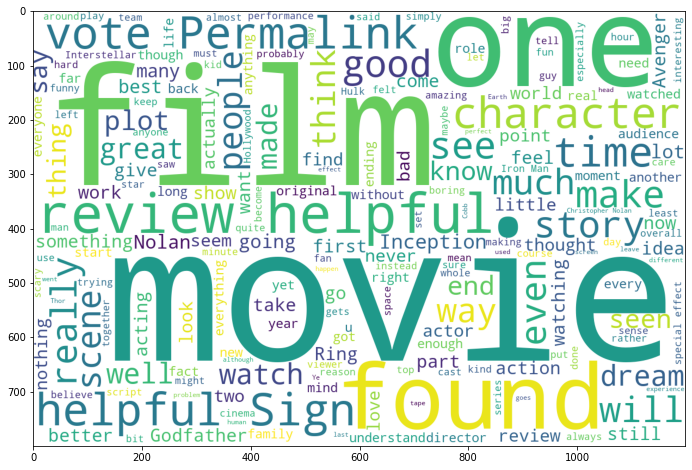

In [41]:
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(only_reviews))
plt.show()

In [ ]:
tf=countvectorizer()

In [ ]:
# Some parameters
# preprocessor not needed now
# stopwords have to supply
# token pattern  -word boundary \b
# analyser- word
# max_df-0.6.Particular word is occuring in 60 percent of the texts .Any words with percentage of occuring value more than max_df will not be considered.Overusedword.
# min_df-0.1.If someword is not occuring in the menimum specified percentage of documents then that word is not going to be considered.Rareword or mistake.
# max_features=Only this many words will b extrected.
# vocabulry-

In [42]:
# ngram how many words together range for (1,1)-uniword,(2,2)-bigram,(1,2)-both unigram and bigram

In [82]:
tf=CountVectorizer(token_pattern="[a-z']+",max_df=0.6,min_df=10,stop_words=STOPWORDS,ngram_range=(2,2))

In [83]:
tf_mat=tf.fit_transform(movie_reviews_new.Review)
# no of comoumns =number of 0s  

In [84]:
tf.vocabulary_ #gives word as well as its column numbers

{'one best': 1875,
 'movies seen': 1718,
 'almost impossible': 61,
 'expectations high': 605,
 'see movie': 2328,
 'movie good': 1567,
 'describe movie': 421,
 'movie awesome': 1495,
 'every little': 575,
 'see one': 2330,
 'one many': 1916,
 'many things': 1403,
 'together fight': 2645,
 'many characters': 1386,
 'larger life': 1218,
 'people even': 2002,
 'widow hawkeye': 2851,
 'captain america': 270,
 'entire cast': 542,
 'mark ruffalo': 1411,
 'every actor': 569,
 'seen better': 2340,
 'every single': 585,
 'iron man': 1147,
 'scarlett johansson': 2281,
 'character arcs': 285,
 'course film': 383,
 'film will': 800,
 'want give': 2740,
 'give away': 886,
 'away movie': 130,
 'movie review': 1634,
 'one film': 1891,
 'every scene': 583,
 'saw movie': 2263,
 'even though': 565,
 'avengers movie': 125,
 'going say': 923,
 'hulk thor': 1094,
 'must see': 1757,
 'type film': 2697,
 'instant classic': 1137,
 'movie really': 1631,
 'high quality': 1061,
 'previous work': 2099,
 'popcorn 

In [85]:
word_freq=np.array(tf_mat.sum(axis=0)).reshape(tf_mat.shape[1],)

In [86]:
word_freq.shape

(2968,)

In [87]:
# Given a collecting condition already saved money

In [88]:
word_freq

array([11, 22, 28, ..., 11, 18, 10])

In [89]:
# 

In [90]:
tf_vocab_reverse={v:k for k,v in tf.vocabulary_.items()}
tf_vocab_reverse[2]

"'the ring'"

In [91]:
# Replace coloumn count by frequency count.

In [92]:
word_freq_dict={}
for k,v in tf.vocabulary_.items():
    v= word_freq[v]
    word_freq_dict[k]=v

In [93]:
word_freq_dict

{'one best': 269,
 'movies seen': 63,
 'almost impossible': 16,
 'expectations high': 11,
 'see movie': 194,
 'movie good': 232,
 'describe movie': 12,
 'movie awesome': 23,
 'every little': 14,
 'see one': 24,
 'one many': 26,
 'many things': 40,
 'together fight': 13,
 'many characters': 61,
 'larger life': 18,
 'people even': 16,
 'widow hawkeye': 24,
 'captain america': 299,
 'entire cast': 18,
 'mark ruffalo': 117,
 'every actor': 19,
 'seen better': 10,
 'every single': 82,
 'iron man': 427,
 'scarlett johansson': 74,
 'character arcs': 10,
 'course film': 11,
 'film will': 92,
 'want give': 11,
 'give away': 20,
 'away movie': 10,
 'movie review': 14,
 'one film': 38,
 'every scene': 66,
 'saw movie': 63,
 'even though': 199,
 'avengers movie': 38,
 'going say': 13,
 'hulk thor': 25,
 'must see': 80,
 'type film': 18,
 'instant classic': 12,
 'movie really': 139,
 'high quality': 13,
 'previous work': 11,
 'popcorn movie': 14,
 'never seen': 82,
 'good film': 78,
 'film made': 8

In [94]:
word_freq_dict_sorted={k:v for k,v in sorted(word_freq_dict.items(),
                       key=lambda item:item[1],
                       reverse=True)}

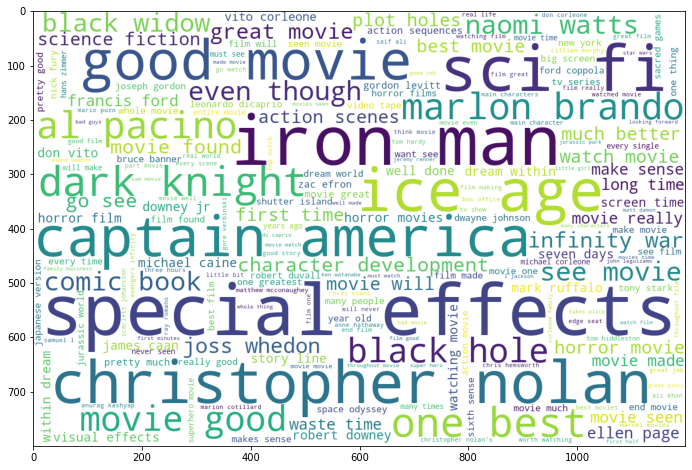

In [95]:
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_frequencies(word_freq_dict_sorted))
plt.show()